In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from PartOne import *
import numpy as np
import pandas
import matplotlib.pyplot as plt

In [ ]:
def read_trajectories(path: str) -> 'ndarry':
  """Input:
     path -> string of the csv file path

     Output:
     ndarray with shape(x, y)

     import pandas and numpy are required
  """

  Data_temp = pandas.read_csv(path)
  return np.array(Data_temp)



In [ ]:
Data_Highway1 = pandas.read_csv("/content/highway.csv")

In [ ]:
Data_Highway = read_trajectories("/content/highway.csv")

In [ ]:
Data_Highway1

,id,x,y,lane
0,0,4.585165,52.366171,4
1,0,8.392308,52.932288,4
2,0,9.224868,50.995742,4
3,0,11.463425,47.142148,4
4,0,15.415455,50.746214,4
...,...,...,...,...
13740,799,50.559158,30.123171,2
13741,799,53.750748,27.187805,2
13742,799,53.287687,28.116916,2
13743,799,58.189428,27.430886,2


In [ ]:
def center_trajectories(traj_list: list, distance_func) -> "trajectories":
  """Input:
     traj_list -> ndarray of trajectories with shape(m, n, 4)
     m is the number of trajectories in this ndarray
     trajectories are represented by ndarray of shape (n, 4) where n represents 
     the number of points and 4 represents id, x, y, lane coordinates

     Output:
     ndarray with shape(n, 4)

     import pandas and numpy are required
  """
  #traj_list = traj_set.tolist(traj_set)
  traj_list_size = len(traj_list)
  distances = np.zeros(traj_list_size)

  for i in range(traj_list_size):
    for j in range(traj_list_size):
      distances[i] += distance_func(traj_list[i][:, 1:3], traj_list[j][:, 1:3])[0]
  
  return traj_list[np.argmin(distances)]

In [ ]:
def get_arc_length(trajectory) -> int:
  arc_length = 0
  for i in range(len(trajectory)-1):
    arc_length += np.sqrt(euclidean_square(trajectory[i][1:3], trajectory[i+1][1:3]))
  return arc_length

In [ ]:
def n_average_trajectories(traj_list: list, h:int) -> "trajectories":
  """Input:
     traj_list -> ndarray of trajectories with shape(m, n, 4)
     m is the number of trajectories in this ndarray
     trajectories are represented by ndarray of shape (n, 4) where n represents 
     the number of points and 4 represents id, x, y, lane coordinates
    
     h -> the number of points representing the n average trajectories

     Output:
     ndarray with shape(h, 2)

     import pandas and numpy are required
  """
  #traj_list = traj_set.tolist(traj_set)
  traj_list_size = len(traj_list)

  h_average_traj = np.zeros((h+1, 2))

  for i in range(h+1):   
    curr_x_added = 0
    curr_y_added = 0
    for j in range(traj_list_size):
      arc_length = get_arc_length(traj_list[j])
      curr_x = (i+1) / (h+1)
      curr_remaining_arc_length = curr_x * arc_length
      #curr_remaining_arc_length = curr_x
      #print("arc_lenth", curr_x, curr_remaining_arc_length)
      for p in range(len(traj_list[j]) - 1):
        #(traj_list[j][p][1] <= curr_x * ).all() and (traj_list[j][p+1][1] >= curr_x).all()
        line_seg_arc_length = np.sqrt(euclidean_square(traj_list[j][p][1:3], traj_list[j][p+1][1:3]))
        curr_remaining_arc_length -= line_seg_arc_length
        #print("curr_remain", p, curr_remaining_arc_length)
        if curr_remaining_arc_length <= 1e-4 :

          curr_remaining_arc_length += line_seg_arc_length
          proportion = curr_remaining_arc_length / line_seg_arc_length
          #find the equation          
          coefficients = np.polyfit(traj_list[j][p:p+2, 1:3].T[0], traj_list[j][p:p+2, 1:3].T[1], 1)
          polynomial = np.poly1d(coefficients)
          #get the y value
          x1 = traj_list[j][p:p+2, 1:3].T[0][1]
          x2 = traj_list[j][p:p+2, 1:3].T[0][0]
          x_length = np.abs(x1 - x2)
          curr_x = np.minimum(x1, x2) + x_length*proportion
          curr_y_added += polynomial(curr_x)
          curr_x_added += curr_x
          #print(curr_x_added)
          break
    
    curr_y_added = curr_y_added / traj_list_size
    curr_x_added = curr_x_added / traj_list_size
    h_average_traj[i][0] = curr_x_added
    h_average_traj[i][1] = curr_y_added
  
  return h_average_traj



In [ ]:
mask1 = Data_Highway[:, 3] == 1
test1 = Data_Highway[mask1, 0:3]

mask3 = Data_Highway[:, 3] == 3
test3 = Data_Highway[mask3, 0:3]

mask4 = Data_Highway[:, 3] == 4
test4 = Data_Highway[mask4, 0:3]

mask5 = Data_Highway[:, 3] == 5
test5 = Data_Highway[mask5, 0:3]

In [ ]:
lane1 = []
lane3 = []
lane4 = []
lane5 = []
for i in set(test1[:,0]):
  lane1.append(test1[test1[:, 0] == i])
lane1 = np.array(lane1)

for i in set(test3[:,0]):
  lane3.append(test3[test3[:, 0] == i])
lane3 = np.array(lane3)

for i in set(test4[:,0]):
  lane4.append(test4[test4[:, 0] == i])
lane4 = np.array(lane4)

for i in set(test5[:,0]):
  lane5.append(test5[test5[:, 0] == i])
lane5 = np.array(lane5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this

In [ ]:
lane1_center_traj = center_trajectories(lane1, dtw)
lane1_n_average_traj = n_average_trajectories(lane1, 16)


In [ ]:
lane1_center_traj

array([[18.        ,  5.1017879 , 13.79669883],
       [18.        ,  9.62313561, 13.5531486 ],
       [18.        , 12.6817599 , 15.69776739],
       [18.        , 16.79415437, 14.51186172],
       [18.        , 21.83201725, 13.82373348],
       [18.        , 25.5648115 , 15.14006061],
       [18.        , 30.9067717 , 14.92766186],
       [18.        , 36.1177    , 14.4083822 ],
       [18.        , 39.32645206, 13.17278849],
       [18.        , 45.34572125, 16.03869227],
       [18.        , 47.35141454, 15.22970531],
       [18.        , 54.68111883, 15.95321093],
       [18.        , 54.37281913, 17.00108547],
       [18.        , 60.94772743, 13.13945703],
       [18.        , 62.30040194, 15.40101316]])

In [ ]:
print("length of lane 1", len(lane1))
print("length of lane 3", len(lane3))
print("length of lane 4", len(lane4))
print("length of lane 5", len(lane5))

length of lane 1 100
length of lane 3 100
length of lane 4 100
length of lane 5 100


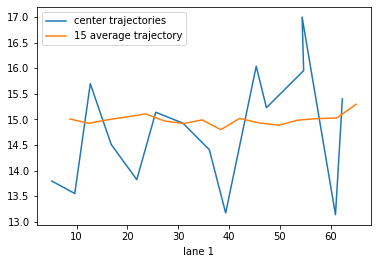

In [ ]:
# plot lane 1 
fig = plt.figure()
fig.text(.5, .02, "lane 1", ha='center')
plt.plot(lane1_center_traj[:, 1], lane1_center_traj[:, 2], label = "center trajectories")

plt.plot(lane1_n_average_traj[:, 0], lane1_n_average_traj[:, 1], label = "15 average trajectory")
plt.legend()
plt.show()

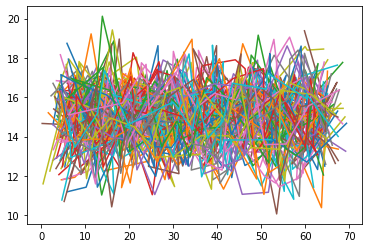

In [ ]:
for i in lane1:
  plt.plot(i[:, 1], i[:, 2])
plt.show()

In [ ]:
#lane 3 and lane 4
lane3_4 = np.concatenate([lane3, lane4])
lane3_4_center_traj = center_trajectories(lane3_4, dtw)
lane3_4_n_average_traj = n_average_trajectories(lane3_4, 16)

In [ ]:
lane3_4_n_average_traj

array([[ 8.79495204, 45.10871283],
       [12.67381869, 44.9342879 ],
       [16.43657407, 44.85267345],
       [20.16334405, 44.93300946],
       [23.92916926, 45.10804812],
       [27.71511678, 45.00864354],
       [31.42728245, 44.96642715],
       [35.1227855 , 44.99748668],
       [38.78387651, 45.1033306 ],
       [42.46622814, 45.00394124],
       [46.13833628, 45.01618194],
       [49.80732085, 44.97352342],
       [53.59043394, 45.06928048],
       [57.45262722, 45.21734393],
       [61.3677304 , 45.05334918],
       [65.19502469, 45.02010461]])

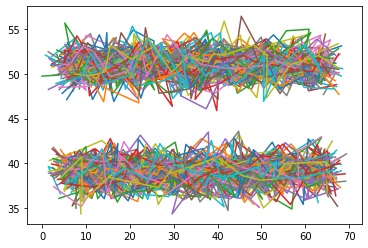

In [ ]:
for i in lane3_4:
  plt.plot(i[:, 1], i[:, 2])
plt.show()

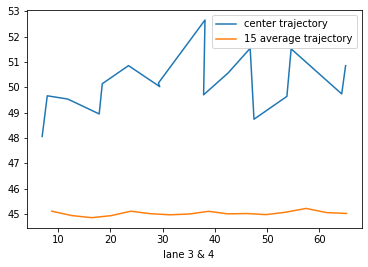

In [ ]:
fig = plt.figure()
fig.text(.5, .02, "lane 3 & 4", ha='center')
plt.plot(lane3_4_center_traj[:, 1], lane3_4_center_traj[:, 2], label = "center trajectory")

plt.plot(lane3_4_n_average_traj[:, 0], lane3_4_n_average_traj[:, 1], label = "16 average trajectory")
plt.legend()
plt.show()

In [ ]:
#Lane 4 and lane 5
lane4_5 = np.concatenate([lane4, lane5])
lane4_5_center_traj = center_trajectories(lane4_5, dtw)
lane4_5_n_average_traj = n_average_trajectories(lane4_5, 16)




In [ ]:
print(lane4_5_center_traj)
#print(lane4_5)
print(lane4_5_n_average_traj)

[[108.          63.66666329  74.15549234]
 [108.          58.23358466  72.10960226]
 [108.          57.18163039  74.0682748 ]
 [108.          49.86304782  71.70034834]
 [108.          45.13822898  74.93283222]
 [108.          42.51674323  74.03217175]
 [108.          37.61014053  69.93487148]
 [108.          35.95350641  72.47232516]
 [108.          30.60994143  72.64702694]
 [108.          22.55786493  71.66194917]
 [108.          20.69046848  72.14779963]
 [108.          21.02253063  72.93178018]
 [108.          12.46065211  73.45648274]
 [108.          11.66530671  71.86128675]
 [108.           6.54091468  72.70529191]]
[[35.02507572 62.06704546]
 [35.21763446 61.97231782]
 [35.00969205 61.91589592]
 [35.04136836 62.06042318]
 [35.1448306  62.0504626 ]
 [35.08867038 62.1233508 ]
 [34.76244215 62.0135901 ]
 [35.3670466  62.02957509]
 [34.65136964 62.09478591]
 [35.03583969 62.09345148]
 [34.83516455 62.01672157]
 [34.67628143 62.07851363]
 [34.72824145 61.9488748 ]
 [34.95632463 62.1

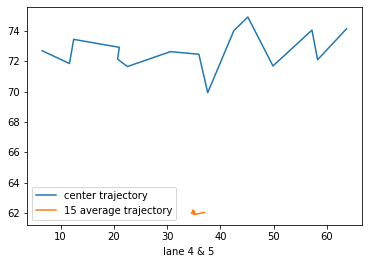

In [ ]:
fig = plt.figure()
fig.text(.5, .02, "lane 4 & 5", ha='center')
plt.plot(lane4_5_center_traj[:, 1], lane4_5_center_traj[:, 2], label = "center trajectory")
lane4_5_n_average_traj = n_average_trajectories(lane4_5, 16)
plt.plot(lane4_5_n_average_traj[:, 0], lane4_5_n_average_traj[:, 1], label = "16 average trajectory")
plt.legend()
plt.show()

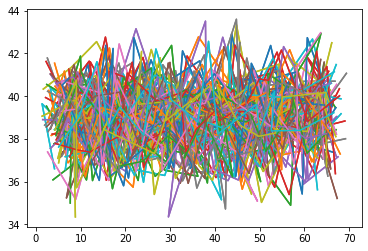

In [ ]:
for i in lane4_5:
  plt.plot(i[:, 1], i[:, 2])
plt.show()

In [ ]:
lane4_5[0]

array([[ 0.        ,  4.58516501, 52.366171  ],
       [ 0.        ,  8.39230844, 52.93228791],
       [ 0.        ,  9.22486754, 50.99574236],
       [ 0.        , 11.46342459, 47.14214751],
       [ 0.        , 15.41545517, 50.74621412],
       [ 0.        , 20.66701771, 54.89248977],
       [ 0.        , 25.48279517, 53.67406084],
       [ 0.        , 25.29231797, 51.42074518],
       [ 0.        , 33.56161726, 50.97490027],
       [ 0.        , 35.97137613, 51.33205557],
       [ 0.        , 37.8258024 , 50.43629147],
       [ 0.        , 45.63420745, 51.9844881 ],
       [ 0.        , 46.90657264, 49.44300558],
       [ 0.        , 52.00476606, 50.50347794],
       [ 0.        , 55.15812711, 50.83864296],
       [ 0.        , 55.72545977, 52.7832399 ],
       [ 0.        , 61.76856218, 51.41660356],
       [ 0.        , 64.74936922, 49.92976787]])

In [ ]:
lane5[0]

array([[12.        , 68.96842393, 77.66369724],
       [12.        , 59.96845865, 71.70240594],
       [12.        , 57.56159584, 73.93117837],
       [12.        , 55.15562784, 71.63991629],
       [12.        , 48.33798426, 72.74623016],
       [12.        , 45.3904725 , 73.03459775],
       [12.        , 39.81695094, 71.08482885],
       [12.        , 37.05346765, 74.04429857],
       [12.        , 32.70538849, 71.88444253],
       [12.        , 27.30638923, 69.70586254],
       [12.        , 27.1252395 , 73.45491875],
       [12.        , 22.81574271, 74.53910773],
       [12.        , 17.12978606, 74.96787243],
       [12.        , 12.23477688, 72.06748655],
       [12.        ,  7.09609922, 71.83284942],
       [12.        ,  5.10985394, 74.97065542]])

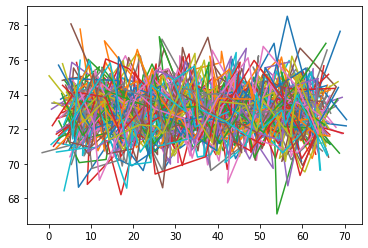

In [ ]:
for i in lane5:
  plt.plot(i[:, 1], i[:, 2])
plt.show()

In [ ]:
lane4_5_n_average_traj = n_average_trajectories(lane5, 16)

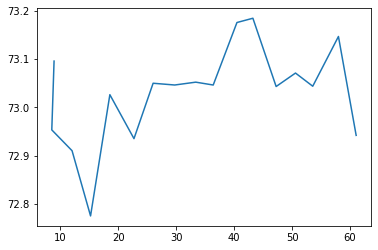

In [ ]:
plt.plot(lane4_5_n_average_traj[:, 0], lane4_5_n_average_traj[:,1])
plt.show()

In [ ]:
#Experiment
#Test on what condition the center trajectory can represent the center of trajectories well and on what condition the n average represent well
#Data is the highway data but with relatively fewer data points to see connections. Also energy data that has data in the similiar range to see which ones make more sense


In [ ]:
lane2 = []
mask2 = Data_Highway[:, 3] == 2
test2 = Data_Highway[mask3, 0:3]

for i in set(test2[:,0]):
  lane2.append(test2[test2[:, 0] == i])
lane2 = np.array(lane2)



#lane4_5 = np.concatenate([lane4, lane5])
lane2_center_traj = center_trajectories(lane2_small, dtw)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  import sys


In [ ]:
lane2_n_average_traj = n_average_trajectories(lane2, 30)
lane2_small = lane2[:5]

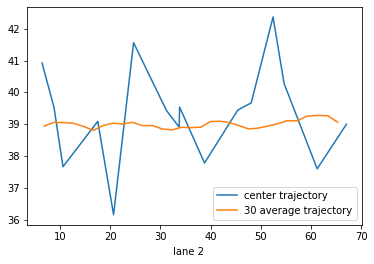

In [ ]:
fig = plt.figure()
fig.text(.5, .02, "lane 2", ha='center')
plt.plot(lane2_center_traj[:, 1], lane2_center_traj[:, 2], label = "center trajectory")
lane4_5_n_average_traj = n_average_trajectories(lane2, 16)
plt.plot(lane2_n_average_traj[:, 0], lane2_n_average_traj[:, 1], label = "30 average trajectory")
plt.legend()
plt.show()

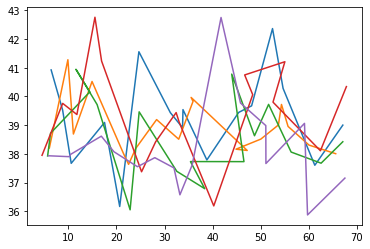

In [ ]:
for i in lane2_small:
  plt.plot(i[:, 1], i[:, 2])
plt.show()

In [ ]:
lane45_small = np.concatenate([lane4_5[:5], lane4_5[100:105]])
lane45small_center_traj = center_trajectories(lane45_small, dtw)
lane45small_average_traj = n_average_trajectories(lane45_small, 30)

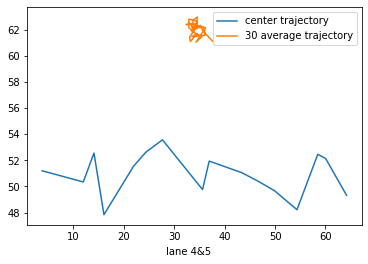

In [ ]:
fig = plt.figure()
fig.text(.5, .02, "lane 4&5", ha='center')
plt.plot(lane45small_center_traj[:, 1], lane45small_center_traj[:, 2], label = "center trajectory")
lane4_5_n_average_traj = n_average_trajectories(lane2, 16)
plt.plot(lane45small_average_traj[:, 0], lane45small_average_traj[:, 1], label = "30 average trajectory")
plt.legend()
plt.show()

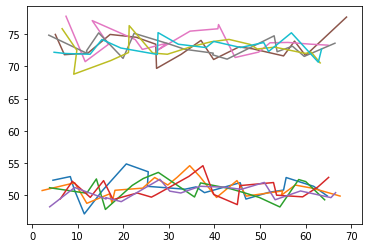

In [ ]:
for i in lane45_small:
  plt.plot(i[:, 1], i[:, 2])
plt.show()

In [ ]:
Data_Energy = read_trajectories("/content/energy.csv")

In [ ]:
energy_test = []
for i in set(Data_Energy[:,0]):
  energy_test.append(Data_Energy[Data_Energy[:, 0] == i])
energy_test = np.array(energy_test)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  after removing the cwd from sys.path.


In [ ]:
len(energy_test[:10])

173

In [ ]:
energy_center_traj = center_trajectories(energy_test[:10], dtw)
energy_n_average_traj = n_average_trajectories(energy_test[:10], 30)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RankWarning: Polyfit may be poorly conditioned
  


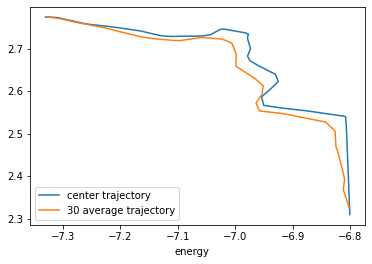

In [ ]:
fig = plt.figure()
fig.text(.5, .02, "energy", ha='center')
plt.plot(energy_center_traj[:, 1], energy_center_traj[:, 2], label = "center trajectory")
lane4_5_n_average_traj = n_average_trajectories(lane2, 16)
plt.plot(energy_n_average_traj[:, 0], energy_n_average_traj[:, 1], label = "30 average trajectory")
plt.legend()
plt.show()

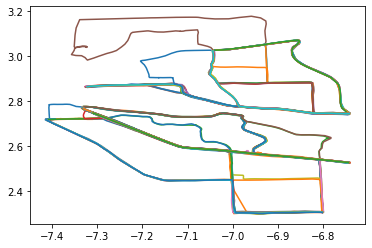

In [ ]:
for i in energy_test:
  plt.plot(i[:, 1], i[:, 2])
plt.show()

In [ ]:
list1_test = list1[0].copy()
small_test = list1_test[:2, :]
small_test[0][2] = 5.8960606
small_test[1][2] = 10.16242812
print(small_test)
np.sqrt(get_arc_length(small_test))

[[ 5.          5.8960606   5.8960606   1.        ]
 [ 5.         10.16242812 10.16242812  1.        ]]


6.033554814190443

In [ ]:
small_test[0:3, 1:3].T[0]

array([[ 5.8960606 , 10.16242812],
       [ 5.8960606 , 10.16242812]])

In [ ]:
c = np.polyfit(small_test[0:3, 1:3].T[0], small_test[0:3, 1:3].T[1], 1)

In [ ]:
polynomial = np.poly1d(c)

In [ ]:
np.polyfit([100,100], [200,200], 1)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


array([  1., 100.])

In [ ]:
y_axis = polynomial(10.16242812)
print(y_axis)

10.16242811737173


In [ ]:
list1[0:2]

array([array([[ 5.        ,  5.8960606 , 11.19921242,  1.        ],
       [ 5.        , 10.16242812, 11.43158779,  1.        ],
       [ 5.        , 14.71321479, 14.48058625,  1.        ],
       [ 5.        , 16.46747353, 14.08359399,  1.        ],
       [ 5.        , 20.16505974, 14.3877125 ,  1.        ],
       [ 5.        , 24.58838775, 12.87658329,  1.        ],
       [ 5.        , 28.65135402, 15.34068367,  1.        ],
       [ 5.        , 33.43515413, 15.31196098,  1.        ],
       [ 5.        , 40.36858937, 13.92042258,  1.        ],
       [ 5.        , 41.23905658, 16.13664265,  1.        ],
       [ 5.        , 46.3013349 , 12.53529688,  1.        ],
       [ 5.        , 53.16012169, 13.41478046,  1.        ],
       [ 5.        , 52.32155026, 14.62250731,  1.        ],
       [ 5.        , 58.46022552, 13.05233905,  1.        ],
       [ 5.        , 61.58793809, 16.84988249,  1.        ],
       [ 5.        , 63.30178227, 17.24193698,  1.        ]]),
       array([[

In [ ]:
list1[0].shape

(16, 4)

In [ ]:
print(np.sqrt(get_arc_length(list1[0])))
n_average_trajectories(list1[:2], 2)

8.156832306014508
arc_lenth 0.5 33.266956634220975
curr_remain 0 28.99426542213484
curr_remain 1 23.51648750382534
curr_remain 2 21.71786953608188
curr_remain 3 18.007797862015458
curr_remain 4 13.333469868634037
curr_remain 5 8.581682252198721
curr_remain 6 3.7977959130310524
curr_remain 7 -3.27390142854272
37.15869753536725
arc_lenth 0.5 37.40587306248906
curr_remain 0 30.901478282996862
curr_remain 1 29.6840759116034
curr_remain 2 24.110736655214637
curr_remain 3 20.90650447654884
curr_remain 4 10.60545546723604
curr_remain 5 5.892977813220664
curr_remain 6 1.3968459339616492
curr_remain 7 -0.7372898662900922
68.6106016519739
arc_lenth 1.0 66.53391326844195
curr_remain 0 62.26122205635582
curr_remain 1 56.78344413804632
curr_remain 2 54.98482617030286
curr_remain 3 51.27475449623643
curr_remain 4 46.600426502855015
curr_remain 5 41.8486388864197
curr_remain 6 37.06475254725203
curr_remain 7 29.993055205678253
curr_remain 8 27.61201666488023
curr_remain 9 21.399420331184125
curr_rema

array([[34.30530083, 14.24441874],
       [62.55296865, 16.19553825]])